In [ ]:
path = "../datasets/irony/test_text.txt"

In [ ]:
with open(path, 'r', encoding="utf8") as f2:
    data = f2.read()

In [ ]:
import re

line = data[:200]

# Initialise lists
tokens = []
unmatchable = []

# Compile patterns for speedup
token_pat = re.compile(r'\w+')
skippable_pat = re.compile(r'\s+')  # typically spaces

# As long as there's any material left...
while line:
    # Try finding a skippable token delimiter first.
    skippable_match = re.search(skippable_pat, line)
    if skippable_match and skippable_match.start() == 0:
        # If there is one at the beginning of the line, just skip it.
        line = line[skippable_match.end():]
    else:
        # Else try finding a real token.
        token_match = re.search(token_pat, line)
        if token_match and token_match.start() == 0:
            # If there is one at the beginning of the line, tokenise it.
            tokens.append(line[:token_match.end()])
            line = line[token_match.end():]
        else:
            # Else there is unmatchable material here.
            # It ends where a skippable or token match starts, or at the end of the line.
            unmatchable_end = len(line)
            if skippable_match:
                unmatchable_end = skippable_match.start()
            if token_match:
                unmatchable_end = min(unmatchable_end, token_match.start())
            # Add it to unmatchable and discard from line.
            unmatchable.append(line[:unmatchable_end])
            line = line[unmatchable_end:]

In [ ]:
#data = data.split("\n")

In [ ]:
data[:5]

- Only words 
- Only @
- Only # 
- Only Non-words
- Only Uppercase letters
- 

In [ ]:
tokens

In [ ]:
unmatchable

In [ ]:
data[:10]

Interesting tokenizers
- Only #
- Only Non-words
- Only Uppercase letters
- Only emojis

Ideal tokenizer

- Keep words
- keep #
- keep punctuation
- remove emojis
- keep %
- keep numbers

- Ida     # hastag
- Magnus  # uppercase
- Rasmus  # ideal tokenizer
- Sabrina # Non-words
- Ruben   # emoji, ideal

In [ ]:
import re
line = data[:200]

# Initialise lists
tokens = []
unmatchable = []

# Compile patterns for speedup
token_pat = re.compile(r'\w+')
skippable_pat = re.compile(r'\s+')  # typically spaces

# As long as there's any material left...
while line:
    # Try finding a skippable token delimiter first.
    skippable_match = re.search(skippable_pat, line)
    if skippable_match and skippable_match.start() == 0:
        # If there is one at the beginning of the line, just skip it.
        line = line[skippable_match.end():]
    else:
        # Else try finding a real token.
        token_match = re.search(token_pat, line)
        if token_match and token_match.start() == 0:
            # If there is one at the beginning of the line, tokenise it.
            tokens.append(line[:token_match.end()])
            line = line[token_match.end():]
        else:
            # Else there is unmatchable material here.
            # It ends where a skippable or token match starts, or at the end of the line.
            unmatchable_end = len(line)
            if skippable_match:
                unmatchable_end = skippable_match.start()
            if token_match:
                unmatchable_end = min(unmatchable_end, token_match.start())
            # Add it to unmatchable and discard from line.
            unmatchable.append(line[:unmatchable_end])
            line = line[unmatchable_end:]

In [ ]:
data

In [ ]:
import emoji
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [ ]:
text ="🤔 🙈 me así, se 😌 ds 💕👭👙 hello 👩🏾‍🎓 emoji hello 👨‍👩‍👦‍👦 how are 😊 you today🙅🏽🙅🏽"
extract_emojis(text)

In [ ]:
emoji.UNICODE_EMOJI

In [ ]:
import collections
import nltk.tokenize
import numpy
import pandas
import pickle
import seaborn
import matplotlib.pyplot as plt

# 1. Remove a subset of about 5000 sentences from the news commentary dataset to be used for evaluation. For the TweetEval datasets, you can use the standard training/validation split.

In [ ]:
tok = nltk.tokenize.TreebankWordTokenizer()
location = "../datasets/irony/train_text.txt"
with open(location, 'r', encoding="utf8") as f:
    data = f.read().split("\n")
    hold_out = data[:500]
    data = data[500: 5000]

# 2. Load and tokenise your datasets so that, for each of the corpora, you get a list of sentences, each sentence represented by a list of tokens. Use the same tokeniser for all datasets.

In [ ]:
corpus = []
for line in data:
    smth = []
    for t in tok.tokenize(line):
        smth.append(t)
            
    corpus.append(smth)

In [ ]:
data

In [ ]:
corpus[0:25]

# 3. Follow the instructions at
http://www.nltk.org/api/nltk.lm.html#module-nltk.lm
to train maximum-likelihood language models of varying orders (e.g., n=2..6) for
each of your corpora. Make a note of the size of the n-gram lists for each
n-gram order. You might also plot them.

In [ ]:
from nltk.util import bigrams
list(bigrams(corpus[0]))

In [ ]:
from nltk.util import pad_sequence
list(pad_sequence(corpus[0],pad_left=True,left_pad_symbol="<s>",pad_right=True,right_pad_symbol="</s>",n=2))

In [ ]:
from nltk.lm.preprocessing import pad_both_ends
list(pad_both_ends(corpus[0], n=2))

In [ ]:
list(bigrams(pad_both_ends(corpus[0], n=2)))

In [ ]:
from nltk.util import everygrams

In [ ]:
padded_bigrams = list(pad_both_ends(corpus[0], n=2))
list(everygrams(padded_bigrams, max_len=2))

In [ ]:
from nltk.lm.preprocessing import flatten
text = corpus
list(flatten(pad_both_ends(sent, n=2) for sent in text))

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
train, vocab = padded_everygram_pipeline(2, text)

In [ ]:
from nltk.lm import MLE
lm = MLE(2)

In [ ]:
len(lm.vocab)

In [ ]:
lm.fit(train, vocab)
print(lm.vocab)
len(lm.vocab)

In [ ]:
print(lm.vocab.lookup(text[0]))

print(lm.vocab.lookup(["aliens", "from", "Mars"]))


In [ ]:
print(lm.counts)

In [ ]:
lm.counts['a']

In [ ]:
lm.counts[['a']]['b']

In [ ]:
lm.score("a")

In [ ]:
lm.score("<UNK>") == lm.score("aliens")

In [ ]:
lm.score("b", ["a"])

In [ ]:
lm.logscore("a")

In [ ]:
test = [("Comeback", 'Strategy'), ('for', 'Europe')]
print(lm.entropy(test))
print(lm.perplexity(test))

In [ ]:
lm.generate(1, random_seed=3)

In [ ]:
lm.generate(5, random_seed=3)

In [ ]:
lm.generate(5, text_seed=['c'], random_seed=3)

## different sizes

In [ ]:
ls = {}
models = {}
for i in range(1,6):
    train, vocab = padded_everygram_pipeline(i, text)
    lm = MLE(i)
    lm.fit(train, vocab)
    print(lm.vocab)
    models[i] = lm
    ls["n-gram order = {} vocabulary size".format(i)] = len(lm.vocab)

In [ ]:
ls

In [ ]:
models

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 3))
ax.bar(ls.keys(), ls.values())
plt.tight_layout()

# Frequency plots

In [ ]:
new_corpus = []
for i in corpus:
    for j in i:
        new_corpus.append(j)

In [ ]:
voc = collections.Counter(new_corpus)
frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

In [ ]:
frq

In [ ]:
frq['idx'] = frq.index + 1

In [ ]:
frq['norm_freq'] = frq.frequency / len(corpus)

In [ ]:
frq['cumul_frq'] = frq.norm_freq.cumsum()

In [ ]:
frq

In [ ]:
seaborn.set_theme(style='whitegrid')

In [ ]:
seaborn.relplot(x='idx', y='cumul_frq', data=frq)
plt.show()

In [ ]:
seaborn.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

In [ ]:
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()


# IMPORTANT: We will want to compare perplexities across different corpora. This only produces meaningful results if all the models use exactly the same vocabulary. To ensure that, create a vocabulary from the largest of your datasets and use it for ALL the corpora.

# 4. Use the lm.generate function to generate some example text from each of your models and compare.

In [ ]:
models[1].generate(10)

In [ ]:
models[1].generate(10)

# 5. Use lm.score and lm.logscore to calculate the scores of a couple of n-grams you find in the texts with the different models. Try 1 or 2 n-grams with all function words and 1 or 2 n-grams that contain specific content words or names.

In [ ]:
gen = models[1].generate(1)
print(gen)
print(models[1].score(gen))
print(models[1].logscore(gen))

In [ ]:
print(models[1].score(gen))
print(models[1].logscore(gen))

In [ ]:
asd = hold_out[0]
print(asd)
print(models[2].score(asd))

In [ ]:
models[1].perplexity("Gold")

# Use the lm.perplexity function to compute the perplexity of the validation sets from each dataset with each of the language models and compare. Keep in mind that LOWER perplexity is BETTER.

In [ ]:
hold_out_corpus = []
for line in hold_out:
    smth = []
    for t in tok.tokenize(line):
        smth.append(t)
            
    hold_out_corpus.append(smth)

In [ ]:
list(bigrams(hold_out_corpus[0]))

# Annotations

In [ ]:
from nltk.metrics.agreement import AnnotationTask
import pandas as pd

In [ ]:
ruben = pd.read_csv("../datasets/annotations/annotations_ruben.csv",names=["Ruben"])

In [ ]:
rasmus = pd.read_csv("../datasets/annotations/annotations_rasmus.csv", names=["Rasmus"])

In [ ]:
sabrina = pd.read_csv("../datasets/annotations/annotations_sabrina.csv", names=["Sabrina"])

In [ ]:
ida = pd.read_csv("../datasets/annotations/annotations_ida.csv", names=["Ida"])

In [ ]:
true = pd.read_csv("../datasets/annotations/iaa_labels.txt", names=["True"])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ruben, true)

In [ ]:
confusion_matrix(rasmus, true)

In [ ]:
confusion_matrix(sabrina, true)

In [ ]:
confusion_matrix(ida, true)

In [ ]:
confusion_matrix(true, true)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ruben, true)

In [ ]:
accuracy_score(rasmus, true)

In [ ]:
accuracy_score(ida, true)

In [ ]:
accuracy_score(sabrina, true)

In [ ]:
accuracy_score(true, true)

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
ls = []

In [ ]:
ls.append(cohen_kappa_score(rasmus, true))

In [ ]:
ls.append(cohen_kappa_score(ruben, true))

In [ ]:
ls.append(cohen_kappa_score(sabrina, true))

In [ ]:
ls.append(cohen_kappa_score(ida, true))

In [ ]:
import numpy as np
np.mean(ls)

In [ ]:
ls.append(cohen_kappa_score(true, true))

# Imports

In [2]:
import nltk.tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
PATHS = {}

#Path to the irony datasets
PATHS["irony"] = "../datasets/irony/{}.txt"

#Path to the stance datasets
PATHS["stance"] = "../datasets/stance/{}.txt"

#Path to our manual annotation answers
PATHS["MMA"] = "../datasets/annotations/annotations_{}.csv"

# Binary Classification on Irony Dataset

## Tokenizing data

In [4]:
def tokenizer(file_name):
    tok = nltk.tokenize.TreebankWordTokenizer()
    
    with open(file_name, 'r', encoding="utf8") as f:
        data = f.read().split("\n")
    
    # tokenizes data, output: list of lists (sublist = sentence)
    corpus = [[t for t in tok.tokenize(line)] for line in data ] 
    
    # converts tokenized data to be a list of strings.
    corpus_list = [" ".join(sentence) for sentence in corpus]
    
    if corpus_list[-1] == "":
        del corpus_list[-1]
    
    return corpus_list

train_corpus = tokenizer("../datasets/irony/train_text.txt")
test_corpus = tokenizer("../datasets/irony/test_text.txt")
validation_corpus = tokenizer("../datasets/irony/val_text.txt")

### Loading the train labels

In [6]:
def y_data(location):
    y_train = []
    for i in open(location):
        y_train.append(i.replace("\n",""))
    return y_train

y_train = y_data("../datasets/irony/train_labels.txt")
y_test = y_data("../datasets/irony/test_labels.txt")
y_val = y_data("../datasets/irony/val_labels.txt")

## Preprocessing

In [8]:
def PPD_pipeline():
    asd = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])
    return asd

In [9]:
preprocessing = PPD_pipeline().fit(train_corpus, y_train)

## Creating pipeline

In [10]:
def model_pipeline(model):
    clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', model)])
    return clf

## Baseline model

In [14]:
LR = model_pipeline(SGDClassifier(loss='log', random_state=42)).fit(train_corpus, y_train);

In [15]:
predicted = LR.predict(test_corpus)
accuracy_score(predicted, y_test)

0.6352040816326531

## Classification models different models

In [16]:
KNN = model_pipeline(KNeighborsClassifier()).fit(train_corpus, y_train)
DTC = model_pipeline(DecisionTreeClassifier(random_state=42)).fit(train_corpus, y_train)
RFC = model_pipeline(RandomForestClassifier(random_state=42)).fit(train_corpus, y_train)
SV  = model_pipeline(SVC(random_state=42)).fit(train_corpus, y_train)
NB  = model_pipeline(MultinomialNB()).fit(train_corpus,y_train)

### Comparison

In [17]:
modelsc = [LR, KNN, DTC, RFC, SV, NB]
d = ["LogisticRegression",
     "KNearestNeighbor",
     "DecisionTreeClassifier",
     "RandomForestClassifier",
     "SupportVectorClassifier",
     "NaiveBayes"]

In [18]:
for idx, model in enumerate(modelsc):
    name = d[idx]
    predict = model.predict(test_corpus)
    print(str(name) + ": ")
    print("     - accuracy score:\t   {}".format( accuracy_score(y_test,predict)))
    print("     - roc accuracy score: {}".format(roc_auc_score(y_test, predict)))
    print("     - recall score: \t   {}".format(recall_score(y_test, predict,  pos_label="1")))
    print("     - precision score:\t   {}".format(precision_score(y_test, predict,  pos_label="1")))
    print("     - f1 score:\t   {}".format(f1_score(y_test, predict,  pos_label="1")))
    print()

LogisticRegression: 
     - accuracy score:	   0.6352040816326531
     - roc accuracy score: 0.6222374798610497
     - recall score: 	   0.5594855305466238
     - precision score:	   0.5386996904024768
     - f1 score:	   0.5488958990536278

KNearestNeighbor: 
     - accuracy score:	   0.6147959183673469
     - roc accuracy score: 0.6080773335689958
     - recall score: 	   0.5755627009646302
     - precision score:	   0.5128939828080229
     - f1 score:	   0.5424242424242425

DecisionTreeClassifier: 
     - accuracy score:	   0.5471938775510204
     - roc accuracy score: 0.5382860988559036
     - recall score: 	   0.49517684887459806
     - precision score:	   0.4375
     - f1 score:	   0.4645550527903469

RandomForestClassifier: 
     - accuracy score:	   0.625
     - roc accuracy score: 0.6121289164734913
     - recall score: 	   0.5498392282958199
     - precision score:	   0.5261538461538462
     - f1 score:	   0.5377358490566038

SupportVectorClassifier: 
     - accuracy score:	 

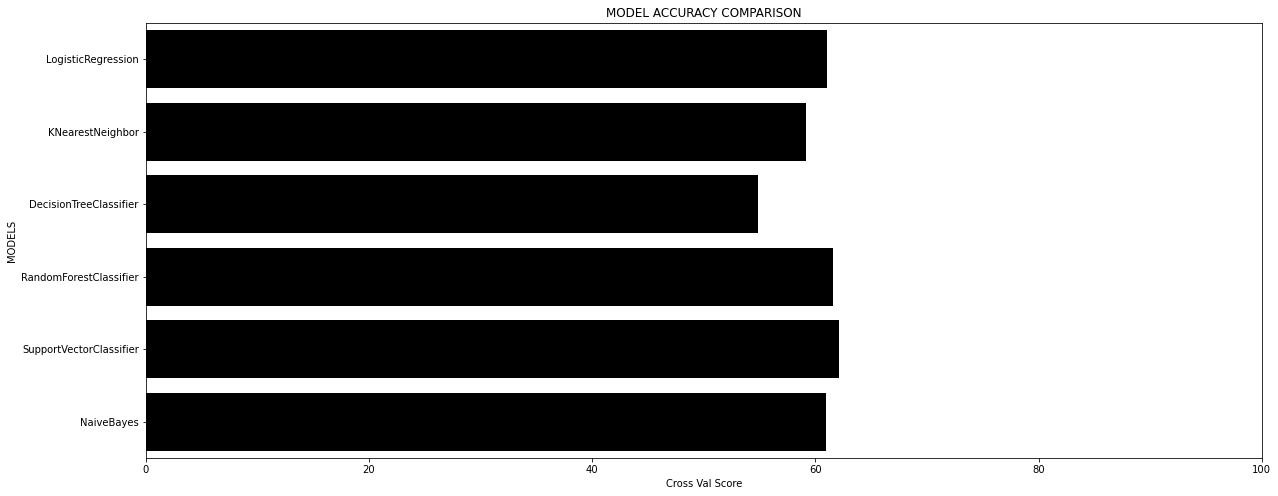

In [19]:
import seaborn as sns

r = pd.DataFrame(columns=["MODELS","R2CV"])
for i, model in enumerate(modelsc):
    name = d[i]
    R2CV = cross_val_score(model,validation_corpus,y_val,cv=10).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("Cross Val Score")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## Tuning the best models

In [20]:
scores = {}

### Random Forest Classifier

In [21]:
RFC_noob = model_pipeline(RandomForestClassifier(random_state=42))

In [197]:
parameters = {"clf__n_estimators": [100, 500, 1000, 2000],
             "clf__max_depth": [3, 6, 12, 24, 48],
             "clf__criterion": ["gini", "entropy"],
             "vect__tokenizer":[None, lambda x:x]}

In [198]:
gs_clf = GridSearchCV(RFC_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [199]:
scores["RFC"] = gs_clf.best_score_

In [200]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__criterion: 'gini'
clf__max_depth: 48
clf__n_estimators: 500
vect__tokenizer: <function <lambda> at 0x000001AF5B5CB670>


In [201]:
RFC_tuned = model_pipeline(RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth= 24, min_samples_split = 2, n_estimators= 500)).fit(train_corpus, y_train)

### Support vector

In [202]:
SV_noob = model_pipeline(SVC(random_state=42))

In [203]:
parameters = {"clf__C": [1,3,9,27],
             "clf__kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
             "clf__degree": [1,3,9,27],
             "vect__tokenizer":[None, lambda x:x]}

In [204]:
gs_clf = GridSearchCV(SV_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [205]:
scores["SV"] = gs_clf.best_score_

In [206]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 1
clf__degree: 3
clf__kernel: 'poly'
vect__tokenizer: <function <lambda> at 0x000001AF5B155670>


In [207]:
SV_tuned = model_pipeline(SVC(random_state=42, C=1, degree=3, kernel="poly"))

### Logistic Regression

In [208]:
LR_noob = model_pipeline(SGDClassifier(loss='log', random_state=42))

In [209]:
parameters = {"clf__alpha": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
             "clf__penalty": ["l2", "l1", "elasticnet"],
             "vect__tokenizer":[None, lambda x:x]}

In [210]:
gs_clf = GridSearchCV(LR_noob, parameters, cv=2, n_jobs=-1).fit(train_corpus, y_train)

In [211]:
scores["LR"] = gs_clf.best_score_

In [212]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.0001
clf__penalty: 'l1'
vect__tokenizer: <function <lambda> at 0x000001AF5B1558B0>


In [213]:
SV_tuned = model_pipeline(SGDClassifier(loss='log', alpha=0.0001, penalty = "l1", random_state=42))

## Final model

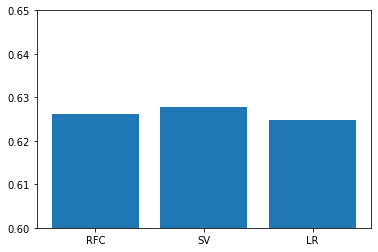

In [218]:
fig, ax = plt.subplots()
ax.bar(scores.keys(), scores.values())
plt.ylim([0.6, 0.65]);

We see that the models that we have tuned to have the highest accuracy score are all equally bad at classifying whether a given sentence is ironic.

It is logical that our model is really bad at classifying text-based irony, since the group members are also very poor at classifying irony, and thus we can not expect the model to outperform us massivel, since it lacks world knowledge and general experience and the emotional aspect of understanding the users intentions. Thus perhabs combining an intention model and an irony model could increase the performance of the irony model.  

# Multiclass classification

In [221]:
labels_stance = pd.read_csv(PATHS["stance"].format("mapping"), delimiter = "\t", header = None)

,0,1
0,0,none
1,1,against
2,2,favor


In [222]:
train_abortion = pd.read_csv(PATHS["stance"].format("/abortion/train_text"), delimiter = "\n", header = None, names = ["tweets"])
train_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/train_labels"), delimiter = "\n", header = None)
test_abortion = pd.read_csv(PATHS["stance"].format("/abortion/test_text"), delimiter = "\n", header = None, names = ["tweets"])
train_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/train_labels"), delimiter = "\n", header = None)
validation_abortion = pd.read_csv(PATHS["stance"].format("/abortion/val_text"), delimiter = "\n", header = None, names = ["tweets"])
train_abortion_labels = pd.read_csv(PATHS["stance"].format("/abortion/train_labels"), delimiter = "\n", header = None)

In [227]:
abortion_train_corpus = tokenizer(PATHS["stance"].format("/abortion/train_text"))
climate_train_corpus = tokenizer(PATHS["stance"].format("/climate/train_text"))
feminist_train_corpus = tokenizer(PATHS["stance"].format("/feminist/train_text"))
hillary_train_corpus = tokenizer(PATHS["stance"].format("/hillary/train_text"))

abortion_val_corpus = tokenizer(PATHS["stance"].format("/abortion/val_text"))
climate_val_corpus = tokenizer(PATHS["stance"].format("/climate/val_text"))
feminist_val_corpus = tokenizer(PATHS["stance"].format("/feminist/val_text"))
hillary_val_corpus = tokenizer(PATHS["stance"].format("/hillary/val_text"))

abortion_test_corpus = tokenizer(PATHS["stance"].format("/abortion/test_text"))
climate_test_corpus = tokenizer(PATHS["stance"].format("/climate/test_text"))
feminist_test_corpus = tokenizer(PATHS["stance"].format("/feminist/test_text"))
hillary_test_corpus = tokenizer(PATHS["stance"].format("/hillary/test_text"))

In [229]:
y_abortion_test = y_data(PATHS["stance"].format("/abortion/train_labels"))
y_climate_test = y_data(PATHS["stance"].format("/climate/train_labels"))
y_feminist_test = y_data(PATHS["stance"].format("/feminist/train_labels"))
y_hillary_test = y_data(PATHS["stance"].format("/hillary/train_labels"))

y_abortion_test = y_data(PATHS["stance"].format("/abortion/test_labels"))
y_climate_test = y_data(PATHS["stance"].format("/climate/test_labels"))
y_feminist_test = y_data(PATHS["stance"].format("/feminist/test_labels"))
y_hillary_test = y_data(PATHS["stance"].format("/hillary/test_labels"))

y_abortion_test = y_data(PATHS["stance"].format("/abortion/test_labels"))
y_climate_test = y_data(PATHS["stance"].format("/climate/test_labels"))
y_feminist_test = y_data(PATHS["stance"].format("/feminist/test_labels"))
y_hillary_test = y_data(PATHS["stance"].format("/hillary/test_labels"))

y_abortion_test = y_data(PATHS["stance"].format("/abortion/val_labels"))
y_climate_test = y_data(PATHS["stance"].format("/climate/val_labels"))
y_feminist_test = y_data(PATHS["stance"].format("/feminist/val_labels"))
y_hillary_test = y_data(PATHS["stance"].format("/hillary/val_labels"))

## Merging stance datasets into one dataset

In [234]:
train_corpus = abortion_train_corpus
train_corpus.append(climate_train_corpus)
train_corpus.append(feminist_train_corpus)
train_corpus.append(hillary_train_corpus)

In [236]:
test_corpus = abortion_test_corpus
test_corpus.append(climate_test_corpus)
test_corpus.append(feminist_test_corpus)
test_corpus.append(hillary_test_corpus)

In [237]:
val_corpus = abortion_val_corpus
val_corpus.append(climate_val_corpus)
val_corpus.append(feminist_val_corpus)
val_corpus.append(hillary_val_corpus)

In [238]:
y_abortion_test

['0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '0',
 '1',
 '2',
 '1',
 '2',
 '1',
 '0',
 '2',
 '0',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '2',
 '2',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '0']

## Creating models